In [51]:
from sklearn.feature_selection import mutual_info_regression
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report)
from sklearn.exceptions import NotFittedError

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier, BaggingClassifier, HistGradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [52]:
data= pd.read_csv('/kaggle/input/framingham/framingham.csv')
data

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,No,0.0,0.0,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,No,0.0,0.0,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,Yes,20.0,0.0,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,Yes,30.0,0.0,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,Yes,23.0,0.0,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,female,48,2.0,Yes,20.0,NaN,0,0,No,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,female,44,1.0,Yes,15.0,0.0,0,0,No,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,female,52,2.0,No,0.0,0.0,0,0,No,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,male,40,3.0,No,0.0,0.0,0,1,No,185.0,141.0,98.0,25.60,67.0,72.0,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   object 
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(4), object(3)
memory usage: 530.1+ KB


In [54]:
data.isnull().sum()

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [55]:
unique_values= {}
for i in data.columns:
    unique_values[i]= data[i].nunique()
    
pd.DataFrame(unique_values,index= ['unique_value']).T

,unique_value
Sex,2
age,39
education,4
currentSmoker,2
cigsPerDay,33
BPMeds,2
prevalentStroke,2
prevalentHyp,2
diabetes,2
totChol,248


In [56]:
round(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,4240.0,50.0,9.0,32.0,42.0,49.0,56.0,70.0
education,4135.0,2.0,1.0,1.0,1.0,2.0,3.0,4.0
cigsPerDay,4211.0,9.0,12.0,0.0,0.0,0.0,20.0,70.0
BPMeds,4187.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
prevalentStroke,4240.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
prevalentHyp,4240.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
totChol,4190.0,237.0,45.0,107.0,206.0,234.0,263.0,696.0
sysBP,4240.0,132.0,22.0,84.0,117.0,128.0,144.0,295.0
diaBP,4240.0,83.0,12.0,48.0,75.0,82.0,90.0,142.0
BMI,4221.0,26.0,4.0,16.0,23.0,25.0,28.0,57.0


In [57]:
data.columns

Index(['Sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [58]:
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data['currentSmoker']= data['currentSmoker'].map({'Yes':1, 'No':0})
data['diabetes']= data['diabetes'].map({'Yes':1, 'No':0})

In [59]:
data

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [60]:
data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mean())
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].median())
data['totChol'] = data['totChol'].fillna(data['totChol'].mean())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())
data['glucose'] = data['glucose'].fillna(data['glucose'].median())
data['education'] = data['education'].fillna(data['education'].mode()[0])
data

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Removing Outlayer

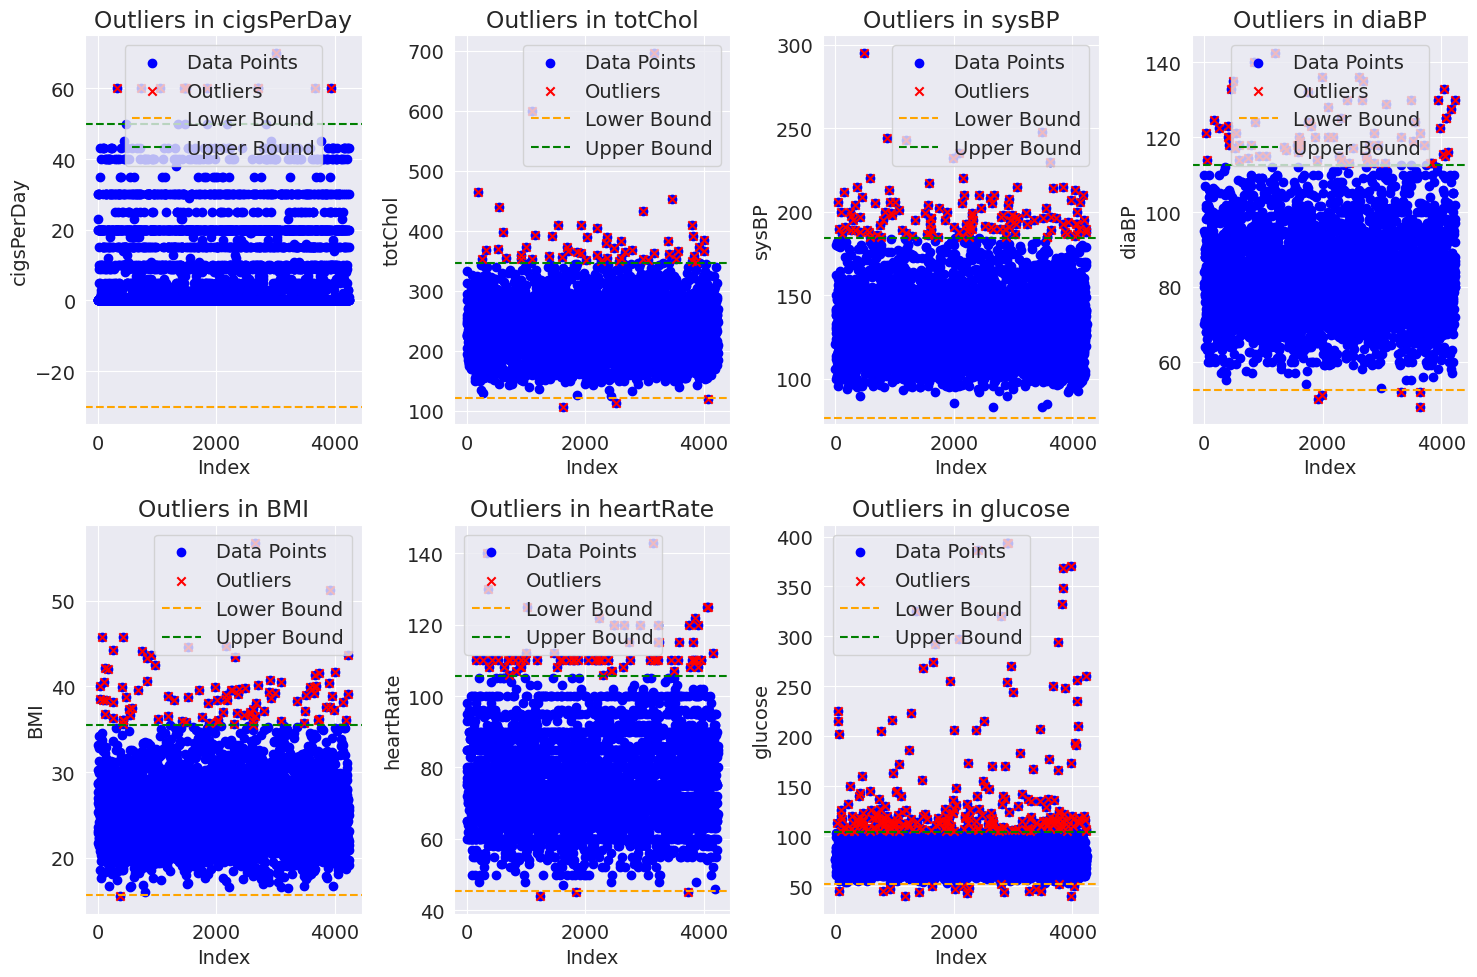

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate IQR and return outlier bounds
def calculate_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# List of columns with potential outliers
columns_with_outliers = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Create scatter plots to show outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 4, i)
    
    lower_bound, upper_bound = calculate_iqr(data, col)
    
    # Create scatter plot
    plt.scatter(data.index, data[col], color='blue', label='Data Points')
    
    # Highlight outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    plt.scatter(outliers.index, outliers[col], color='red', label='Outliers', marker='x')
    
    plt.title(f'Outliers in {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.axhline(y=lower_bound, color='orange', linestyle='--', label='Lower Bound')
    plt.axhline(y=upper_bound, color='green', linestyle='--', label='Upper Bound')
    plt.legend()

plt.tight_layout()
plt.show()

In [63]:
def remove_outliers_iqr(df, column):
    Q1= df[column].quantile(0.25)  
    Q3= df[column].quantile(0.75) 
    IQR= Q3- Q1                   
    lower_bound=Q1- 1.5* IQR    
    upper_bound= Q3+ 1.5* IQR     

    return df[(df[column]>= lower_bound) & (df[column]<= upper_bound)]

columns_with_outliers= ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
for col in columns_with_outliers:
    data = remove_outliers_iqr(data, col)

print(data.shape)

(3655, 16)


In [64]:
data

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [65]:
count_0 = (data["TenYearCHD"] == 0).sum()
count_1 = (data["TenYearCHD"] == 1).sum()

print(f"Count of 0s: {count_0}")
print(f"Count of 1s: {count_1}")


Count of 0s: 3156
Count of 1s: 499


In [66]:
target = data['TenYearCHD']
columns_to_drop = ['TenYearCHD','education']
features = data.drop(columns_to_drop, axis=1)
X= features.values
y= target.values

In [67]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE
# from imblearn.under_sampling import TomekLinks
# from imblearn.combine import SMOTETomek

# # Load your dataset
# data = pd.read_csv('/kaggle/input/framingham/framingham.csv')  # Replace with your dataset path
# data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
# data['currentSmoker'] = data['currentSmoker'].map({'Yes': 1, 'No': 0})
# data['diabetes'] = data['diabetes'].map({'Yes': 1, 'No': 0})
# data['cigsPerDay'] = data['cigsPerDay'].fillna(data['cigsPerDay'].mean())
# data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].median())
# data['totChol'] = data['totChol'].fillna(data['totChol'].mean())
# data['BMI'] = data['BMI'].fillna(data['BMI'].median())
# data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())
# data['glucose'] = data['glucose'].fillna(data['glucose'].median())
# data['education'] = data['education'].fillna(data['education'].mode()[0])

# # Define outlier removal function
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# # Outlier removal
# columns_with_outliers = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
# for col in columns_with_outliers:
#     data = remove_outliers_iqr(data, col)

# import numpy as np
# from sklearn.metrics import precision_recall_curve

# def evaluate_oversampling(X_train, y_train, X_test, y_test):
#     oversampling_methods = {
#         "Random OverSampling": RandomOverSampler(),
#         "SMOTE": SMOTE(),
#         "ADASYN": ADASYN(),
#         "Tomek Links": TomekLinks(),
#         "SMOTE + Tomek Links": SMOTETomek(),
#         "Borderline SMOTE": BorderlineSMOTE(),
#     }

#     results = {}
    
#     for name, method in oversampling_methods.items():
#         # Fit and transform the training data
#         X_resampled, y_resampled = method.fit_resample(X_train, y_train)

#         # Track the number of instances created
#         num_original = pd.Series(y_train).value_counts().get(1, 0)
#         num_resampled = pd.Series(y_resampled).value_counts().get(1, 0)
#         instances_created = num_resampled - num_original

#         # Store the results
#         results[name] = {
#             "X": X_resampled,
#             "y": y_resampled,
#             "instances_created": instances_created
#         }

#     # Train Extra Trees Classifier and evaluate performance
#     evaluation_results = {}
#     for name, data in results.items():
#         X_resampled = data["X"]
#         y_resampled = data["y"]

#         # Train the model with increased class weights for the positive class
#         model = ExtraTreesClassifier(random_state=42, class_weight={0: 1, 1: 5})  # Increased weight for class 1
#         model.fit(X_resampled, y_resampled)

#         # Get predicted probabilities
#         y_scores = model.predict_proba(X_test)[:, 1]

#         # Compute precision-recall curve
#         precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

#         # Find the threshold that gives a desired recall
#         desired_recall = 0.97  # Adjust this as needed
#         optimal_idx = np.argmax(recall >= desired_recall)
#         optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 1.0

#         # Make predictions based on the optimal threshold
#         y_pred = (y_scores >= optimal_threshold).astype(int)

#         # Evaluate the model
#         evaluation_results[name] = {
#             "report": classification_report(y_test, y_pred, output_dict=True),
#             "instances_created": data['instances_created'],
#             "optimal_threshold": optimal_threshold
#         }

#     return evaluation_results

# # Use the same code for splitting the dataset and calling evaluate_oversampling as before

# # Evaluate with outliers removed
# results_with_outliers = evaluate_oversampling(X_train_with_outliers, y_train_with_outliers, X_test, y_test)

# # Evaluate without outliers removed
# results_without_outliers = evaluate_oversampling(X_train_without_outliers, y_train_without_outliers, X_test, y_test)

# # Display results for both scenarios
# print("Results with Outliers Removed:")
# for method, result in results_with_outliers.items():
#     print(f"\nMethod: {method}")
#     print(f"Instances Created: {result['instances_created']}")
#     print(f"Optimal Threshold: {result['optimal_threshold']}")
#     print(classification_report(y_test, (model.predict_proba(X_test)[:, 1] >= result['optimal_threshold']).astype(int)))

# print("\nResults without Outliers Removed:")
# for method, result in results_without_outliers.items():
#     print(f"\nMethod: {method}")
#     print(f"Instances Created: {result['instances_created']}")
#     print(f"Optimal Threshold: {result['optimal_threshold']}")
#     print(classification_report(y_test, (model.predict_proba(X_test)[:, 1] >= result['optimal_threshold']).astype(int)))

In [68]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import RandomOverSampler

# # Load your dataset
# # df = pd.read_csv('your_dataset.csv')  # Uncomment and specify your dataset path
# # Example synthetic data for demonstration
# # df = pd.DataFrame({
# #     'feature1': np.random.rand(3500),
# #     'feature2': np.random.rand(3500),
# #     'TenYearCHD': np.concatenate([np.zeros(3156), np.ones(499)])
# # })

# # Separating features and target variable
# X = data.drop('TenYearCHD', axis=1)
# y = data['TenYearCHD']

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Oversampling
# ros = RandomOverSampler(random_state=42)
# X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# # Fitting the Extra Trees Classifier
# model = ExtraTreesClassifier(random_state=42)
# model.fit(X_train_resampled, y_train_resampled)

# # Predicting probabilities
# y_pred_prob = model.predict_proba(X_test)[:, 1]

# # Setting an optimal threshold (this is an example, adjust as needed)
# optimal_threshold = 0.5  # Adjust based on your analysis

# # Generating predictions based on the threshold
# y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# # Print classification report, handling undefined metrics
# print(classification_report(y_test, y_pred, zero_division=0))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import resample
from imblearn.pipeline import Pipeline as ImbPipeline

# SMOTE functions
def compute_knn(X, y, minority_class, k):
    minority_instances = X[y == minority_class]
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, indices = nbrs.kneighbors(minority_instances)
    return indices

def identify_borderline_instances(X, y, indices, minority_class, k):
    borderline_instances = []
    for i, idx in enumerate(indices):
        ksame = sum(y[idx] == minority_class)
        kmajority = k - ksame
        if ksame < k and kmajority > ksame:
            borderline_instances.append(i)
    return borderline_instances

def generate_synthetic_samples(X, y, borderline_indices, indices, minority_class, num_samples):
    synthetic_samples = []
    num_borderline = len(borderline_indices)
    samples_per_instance = num_samples // num_borderline
    for i in borderline_indices:
        for _ in range(samples_per_instance):
            rand_idx = np.random.choice(indices[i])
            xj = X[rand_idx]
            xi = X[i]
            rand = np.random.rand()
            xnew = xi + rand * (xj - xi)
            synthetic_samples.append(xnew)
    remaining_samples = num_samples - len(synthetic_samples)
    for _ in range(remaining_samples):
        i = np.random.choice(borderline_indices)
        rand_idx = np.random.choice(indices[i])
        xj = X[rand_idx]
        xi = X[i]
        rand = np.random.rand()
        xnew = xi + rand * (xj - xi)
        synthetic_samples.append(xnew)
    return np.array(synthetic_samples)

def smote(X, y, minority_class, k, num_samples):
    indices = compute_knn(X, y, minority_class, k)
    borderline_indices = identify_borderline_instances(X, y, indices, minority_class, k)
    synthetic_samples = generate_synthetic_samples(X, y, borderline_indices, indices, minority_class, num_samples)
    X_new = np.vstack((X, synthetic_samples))
    y_new = np.hstack((y, np.array([minority_class] * len(synthetic_samples))))
    return X_new, y_new

def build_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation='relu')(input_layer)
    decoder = Dense(input_dim, activation='linear')(encoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')
    return autoencoder

if __name__ == "__main__":
    # Load your dataset
    data = pd.read_csv('/kaggle/input/framingham/framingham.csv')  # Update the path to your dataset
    target = data['TenYearCHD']
    columns_to_drop = ['TenYearCHD']
    features = data.drop(columns_to_drop, axis=1)
    X = features.values
    y = target.values

    count_zeros_original = np.sum(y == 0)
    count_ones_original = np.sum(y == 1)
    print(f"Original Count of 0s (No Heart Attack): {count_zeros_original}")
    print(f"Original Count of 1s (Heart Attack): {count_ones_original}")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    input_dim = X_scaled.shape[1]
    encoding_dim = input_dim // 2

    autoencoder = build_autoencoder(input_dim, encoding_dim)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    autoencoder.fit(X_scaled, X_scaled, epochs=200, batch_size=16, validation_split=0.2, verbose=2, callbacks=[early_stopping])

    # Impute missing values
    X_imputed = autoencoder.predict(X_scaled)
    X_imputed = scaler.inverse_transform(X_imputed)

    # Replace NaNs in original X with imputed values
    X_final = np.where(np.isnan(X), X_imputed, X)

    # Oversampling and Undersampling
    over = ADASYN(sampling_strategy='minority', random_state=42)
    under = RandomUnderSampler(sampling_strategy='majority', random_state=42)

    pipeline = ImbPipeline(steps=[('over', over), ('under', under)])

    X_resampled, y_resampled = pipeline.fit_resample(X_final, y)
    
    k = 5 
    num_samples = 333 
    minority_class = 1  

    # Apply SMOTE
    X_final_resampled, y_final_resampled = smote(X_resampled, y_resampled, minority_class, k, num_samples)
    
    # Train-test split
    x_train, x_test, y_train, y_test = train_test_split(X_final_resampled, y_final_resampled, test_size=0.2, random_state=42)

    # Fit the Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(x_train, y_train)
    
    # Predictions and reporting
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))

    count_zeros_new = np.sum(y_final_resampled == 0)
    count_ones_new = np.sum(y_final_resampled == 1)
    print(f"Final Count of 0s (No Heart Attack) in new training set: {count_zeros_new}")
    print(f"Final Count of 1s (Heart Attack) in new training set: {count_ones_new}")
